In [1]:
import load_cdf as cdf
import numpy as np
import math
from calendar import monthrange
from collections import namedtuple
import pickle
import scipy.io 
import scipy.signal

import cdflib 
import datetime as dt

In [2]:
# loading data

with open('backup_SBM2_data_V3.pickle', 'rb') as f:
    FP, AMP, NR, time, Epoch, rua = pickle.load(f)
rua = rua[:,0]
Epoch = np.array(Epoch).astype(int)

In [3]:
def AMP_Check(AMP, EPEAK_THRESH_F): # Default = 750
    return AMP>EPEAK_THRESH_F

In [4]:
def EVENTS_Check(NR, NW_THRES_F): # Default = 20
    return NR>NW_THRES_F

In [5]:
def FREQ_Check(Fp, FP_MIN, FP_MAX, RUA): # Default FP_MIN = 5000; FP_MAX = 60000
    fmin = Fp>(FP_MIN/RUA)
    fmax = Fp<(FP_MAX/RUA)
    temp = fmin.astype(int)+fmax.astype(int)
    temp[temp<2] = 0
    temp[temp==2] = 1
    return temp

In [6]:
def SBM2_Check(AMP, NR, FP, EPEAK_THRESH_F, NW_THRES_F, FP_MIN, FP_MAX, RUA):
    A = AMP_Check(AMP, EPEAK_THRESH_F)
    E = EVENTS_Check(NR, NW_THRES_F)
    F = FREQ_Check(FP, FP_MIN, FP_MAX, RUA)
    A = A.astype(int)
    E = E.astype(int)
    F = F.astype(int)
    temp = A + E + F
    temp[temp<3] = 0
    temp[temp==3] = 1
    temp = temp.astype(bool)
    return temp

In [20]:
def SBM2_Find(events, Epoch, DT, THRES):
    EP = Epoch[np.where(events==1)]
    EV = events[np.where(events==1)]
    for i in range(EP.shape[0]):
        t1 = EP[i]
        t0 = t1-DT
        NE = np.sum(EV[np.where(abs(t0-(DT/2)-EP[i])<(DT/2))])
        if NE > THRES:
            print(NE)
            print(EP[i])
            print('_____')

In [22]:
default = SBM2_Check(AMP, NR, FP, EPEAK_THRESH_F=750, NW_THRES_F=20, FP_MIN=5000, FP_MAX=60000, RUA=rua) # too strict (all 0)
NW_EDIT = SBM2_Check(AMP, NR, FP, EPEAK_THRESH_F=750, NW_THRES_F=10, FP_MIN=5000, FP_MAX=60000, RUA=rua) # better

SBM2_Find(NW_EDIT, Epoch, 1200, 20)

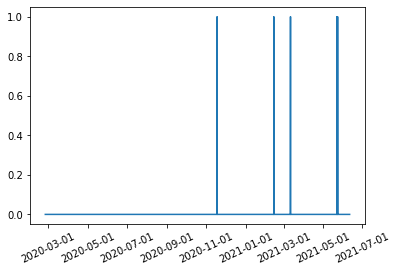

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)

plt.plot(time,NW_EDIT)

In [21]:
Epoch

array([1582590005, 1582590015, 1582590025, ..., 1623384617, 1623384633,
       1623384649])

In [26]:
NW_EDIT.shape[0]

2330067